In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3500,ham,says the &lt;#&gt; year old with a man and m...,NaN,NaN,NaN
5483,ham,So li hai... Me bored now da lecturer repeatin...,NaN,NaN,NaN
3376,ham,Yup. Wun believe wat? U really neva c e msg i ...,NaN,NaN,NaN
1405,ham,K..k..any special today?,NaN,NaN,NaN
4201,ham,Are you happy baby ? Are you alright ? Did you...,NaN,NaN,NaN


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [8]:
df.sample(5)

,v1,v2
717,ham,Book which lesson? then you msg me... I will c...
879,spam,U have a Secret Admirer who is looking 2 make ...
2836,ham,1's reach home call me.
654,ham,Did u got that persons story
236,ham,Or ill be a little closer like at the bus stop...


In [9]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [10]:
df.sample(5)

,target,text
1178,ham,"I'm outside islands, head towards hard rock an..."
351,ham,If you're not in my car in an hour and a half ...
3520,ham,Hey... are you going to quit soon? Xuhui and i...
1370,ham,Hope you are feeling great. Pls fill me in. Ab...
2779,ham,Well I might not come then...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']= encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# 2.EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [21]:
import matplotlib.pyplot as plt

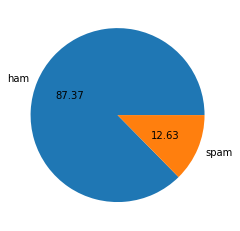

In [22]:
plt.pie(df['target'].value_counts(), labels= ['ham', 'spam'], autopct='%0.2f')
plt.show()

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\HUCON SOLUTIONS
[nltk_data]     PVT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe() # to get the insights of data

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

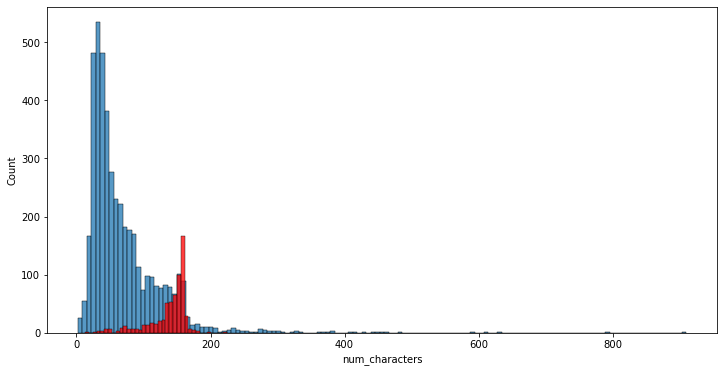

In [35]:
plt.figure(figsize =(12,6))
sns.histplot(df[df['target'] == 0]['num_characters']);
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red');

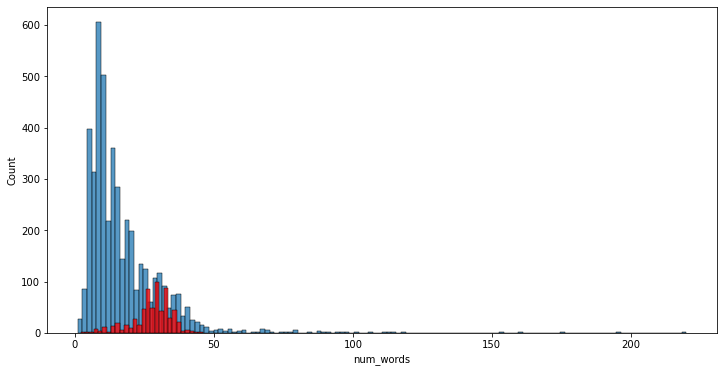

In [36]:
plt.figure(figsize =(12,6))
sns.histplot(df[df['target'] == 0]['num_words']);
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red');

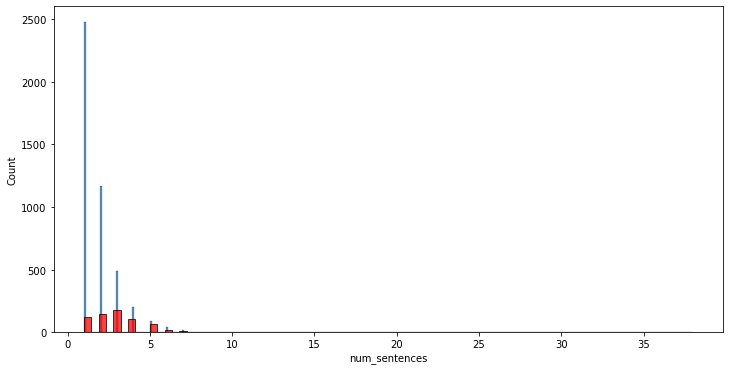

In [37]:
plt.figure(figsize =(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences']);
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'red');

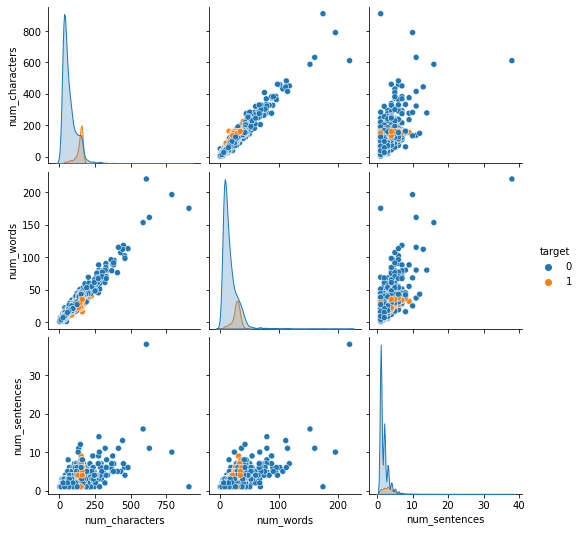

In [38]:
sns.pairplot(df,hue='target');

In [39]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262969,0.267602
num_characters,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sentences,0.267602,0.626118,0.680882,1.000000


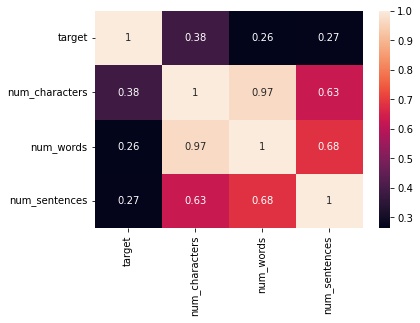

In [40]:
sns.heatmap(df.corr(), annot = True);

# 3. Data Preprocessing:

Lower case

Tokenization

Removing Special characters

Removing stop words and punctuation

Stemming

In [41]:
from nltk.corpus import stopwords

In [42]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [43]:
import string

In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]  # Copying list we have to clone it 
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [45]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

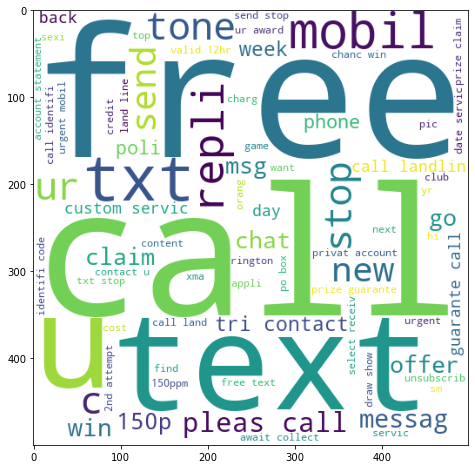

In [50]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc);

In [51]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))

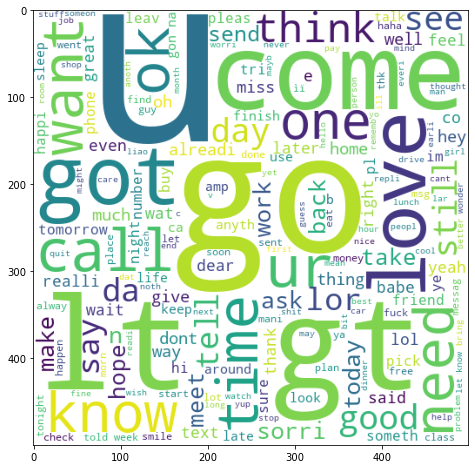

In [52]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc);

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9939

C:\Users\HUCON SOLUTIONS PVT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


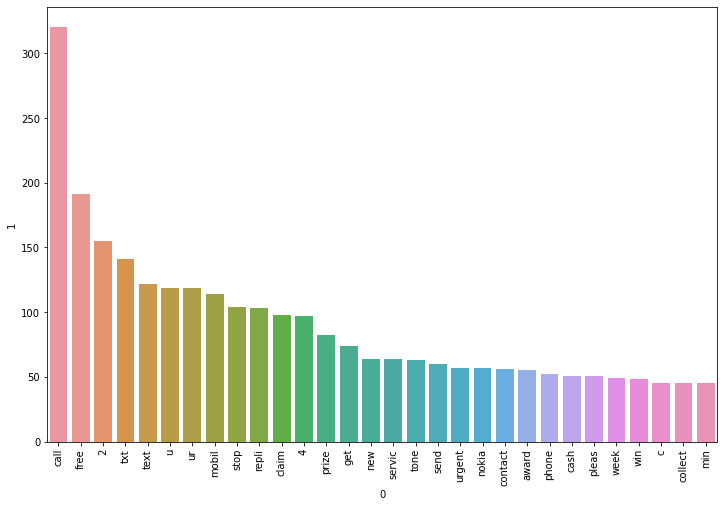

In [56]:
from collections import Counter
plt.figure(figsize=(12,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [57]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35402

C:\Users\HUCON SOLUTIONS PVT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


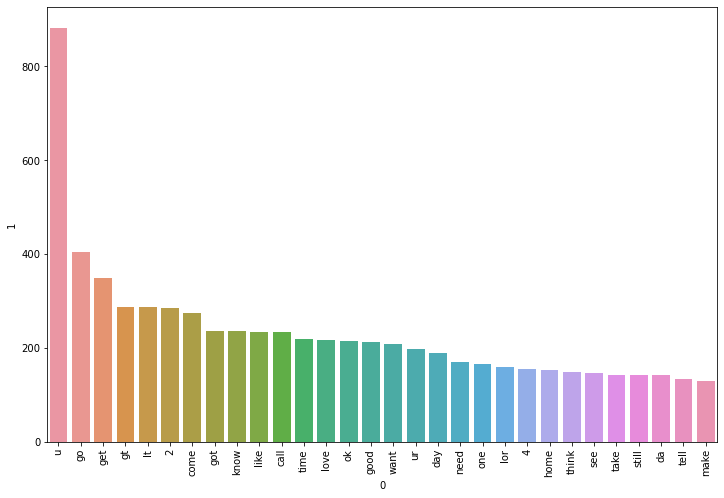

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical');

# 4. Model Building:

In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [61]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [62]:
X.shape

(5169, 3000)

In [63]:
y=df['target'].values

In [64]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train, y_train)  # low precision model 
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [70]:
mnb.fit(X_train, y_train)  # imbalanced data precision data as high we can get not accuracy 
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [71]:
bnb.fit(X_train, y_train)  # high precision model and better accuracy
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [74]:
clfs = {
    'SVC': svc,
    'KN':knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF':rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [75]:
def train_classifier(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [76]:
train_classifier(svc, X_train, y_train)

(0.9758220502901354, 0.9747899159663865)

In [77]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train)
    print("For", name)
    print("Accuracy", current_accuracy)
    print("Precision", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
For KN
Accuracy 0.9052224371373307
Precision 1.0
For NB
Accuracy 0.9709864603481625
Precision 1.0
For DT
Accuracy 0.9294003868471954
Precision 0.8282828282828283
For LR
Accuracy 0.9584139264990329
Precision 0.9702970297029703
For RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829
For AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089
For BgC
Accuracy 0.9584139264990329
Precision 0.8682170542635659
For ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
For GBDT
Accuracy 0.9468085106382979
Precision 0.9191919191919192
For xgb
Accuracy 0.9671179883945842
Precision 0.9333333333333333


In [78]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy': accuracy_scores, 'Precision': precision_scores }).sort_values('Precision',ascending=False)

In [79]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [80]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [81]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


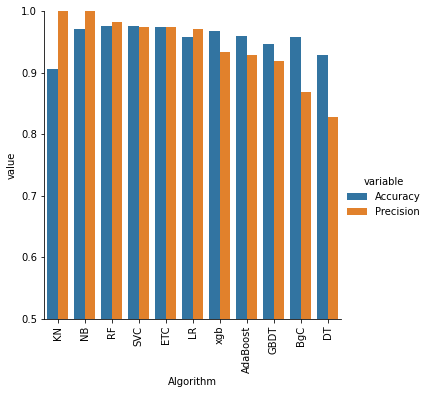

In [82]:
sns.catplot(x = 'Algorithm', y='value',
           hue = 'variable', data=performance_df1, kind = 'bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# 5. Model Improve:

In [83]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [84]:
voting  = VotingClassifier(estimators=[('svm',svc), ('nb', mnb), ('et',etc)], voting='soft') # Weithage is equal for all algorithms

In [85]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [86]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [87]:
estimators = [('svm', svc), ('nb', mnb), ('et',etc)]
final_estimator = RandomForestClassifier()

In [88]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [89]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9615384615384616


In [90]:
import pickle
pickle.dump(tfidf, open('vecotizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))